In [12]:
%pylab inline
from scipy import interpolate
import pandas as pd
import numpy as np
from scipy.special import comb
import matplotlib.pyplot as plt
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['poly']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3331: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)
C:\Users\RAJAT BHARDWAJ\anaconda3\lib\site-package

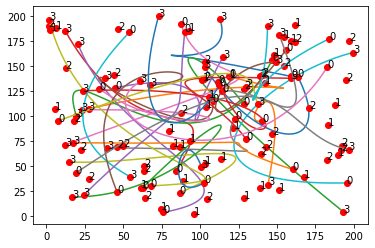

In [14]:
dd = pd.read_excel("C:\\Users\\RAJAT BHARDWAJ\\Desktop\\project\\datafile.xls")
prev=0
curr=0
for x in dd.index:
    if(dd.loc[x].X_value=='\n'):
        curr=x
        #print(dd.loc[curr].X_value)
        d1=dd[prev:curr]
        x1=d1.X_value.astype(int)
        y1=-1*d1.Y_value.astype(int)
        curve=np.polyfit(x1,y1,5)
        poly = np.poly1d(curve)

        list1 =[]

        for i in x1.index:
            list2 =[]
            list2.append(x1[i])
            list2.append(-1*y1[i])
            list1.append(list2)
        #print(list1)
        def bernstein_poly(i, n, t):
            return comb(n, i) * ( t**(n-i) ) * (1 - t)**i
        


        def bezier_curve(points, nTimes=1000):
            """
            Given a set of control points, return the
            bezier curve defined by the control points.

            points should be a list of lists, or list of tuples
            such as [ [1,1], 
                 [2,3], 
                 [4,5], ..[Xn, Yn] ]
            nTimes is the number of time steps, defaults to 1000

            See http://processingjs.nihongoresources.com/bezierinfo/
            """

            nPoints = len(points)
            xPoints = np.array([p[0] for p in points])
            yPoints = np.array([p[1] for p in points])

            t = np.linspace(0.0, 1.0, nTimes)

            polynomial_array = np.array([ bernstein_poly(i, nPoints-1, t) for i in range(0, nPoints)   ])

            xvals = np.dot(xPoints, polynomial_array)
            yvals = np.dot(yPoints, polynomial_array)

            return xvals, yvals


        if __name__ == "__main__":
            x
        

            nPoints = 4
            points = np.random.rand(nPoints,2)*200
            xpoints = [p[0] for p in points]
            ypoints = [p[1] for p in points]

            xvals, yvals = bezier_curve(points, nTimes=1000)
            plt.plot(xvals, yvals)
            plt.plot(xpoints, ypoints, "ro")
            for nr in range(len(points)):
                
                plt.text(points[nr][0], points[nr][1], nr)
            

        #rgb = (random.random(), random.random(), random.random())
        #plot(new_x,new_y,c=numpy.random.rand(3,))
        #t, c, k = interpolate.splrep(d1.X_value.astype(int),-1*d1.Y_value.astype(int), s=0, k=4)
        prev=curr+1
plt.show()